In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import xgboost as xgb

C:\Users\Prakhar pc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import metrics

## Date Collection and Processing

In [7]:
calories_data = pd.read_csv("calories.csv")

In [8]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
excercise_data = pd.read_csv("exercise.csv")

In [10]:
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## combining the dataframes

In [11]:
calories_excercise_data = pd.concat([excercise_data,calories_data['Calories']],axis=1)

In [12]:
calories_excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## getting the know the data

In [13]:
calories_excercise_data.shape

(15000, 9)

In [14]:
calories_data.info

<bound method DataFrame.info of         User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]>

In [15]:
calories_excercise_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# checking that is there's any missing vlue or infinite value 

In [16]:
calories_excercise_data.isnull()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [17]:
calories_excercise_data.isna()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


# Data Visualization

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

In [20]:
#calories_excercise_data.hist(bins=1500,figsize=(20,15))

## Looking for coorelations

In [21]:
corr_matrix=calories_excercise_data.corr()
corr_matrix['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

array([[<AxesSubplot:xlabel='Calories', ylabel='Calories'>,
        <AxesSubplot:xlabel='Duration', ylabel='Calories'>,
        <AxesSubplot:xlabel='Heart_Rate', ylabel='Calories'>,
        <AxesSubplot:xlabel='Body_Temp', ylabel='Calories'>],
       [<AxesSubplot:xlabel='Calories', ylabel='Duration'>,
        <AxesSubplot:xlabel='Duration', ylabel='Duration'>,
        <AxesSubplot:xlabel='Heart_Rate', ylabel='Duration'>,
        <AxesSubplot:xlabel='Body_Temp', ylabel='Duration'>],
       [<AxesSubplot:xlabel='Calories', ylabel='Heart_Rate'>,
        <AxesSubplot:xlabel='Duration', ylabel='Heart_Rate'>,
        <AxesSubplot:xlabel='Heart_Rate', ylabel='Heart_Rate'>,
        <AxesSubplot:xlabel='Body_Temp', ylabel='Heart_Rate'>],
       [<AxesSubplot:xlabel='Calories', ylabel='Body_Temp'>,
        <AxesSubplot:xlabel='Duration', ylabel='Body_Temp'>,
        <AxesSubplot:xlabel='Heart_Rate', ylabel='Body_Temp'>,
        <AxesSubplot:xlabel='Body_Temp', ylabel='Body_Temp'>]],
      dtype

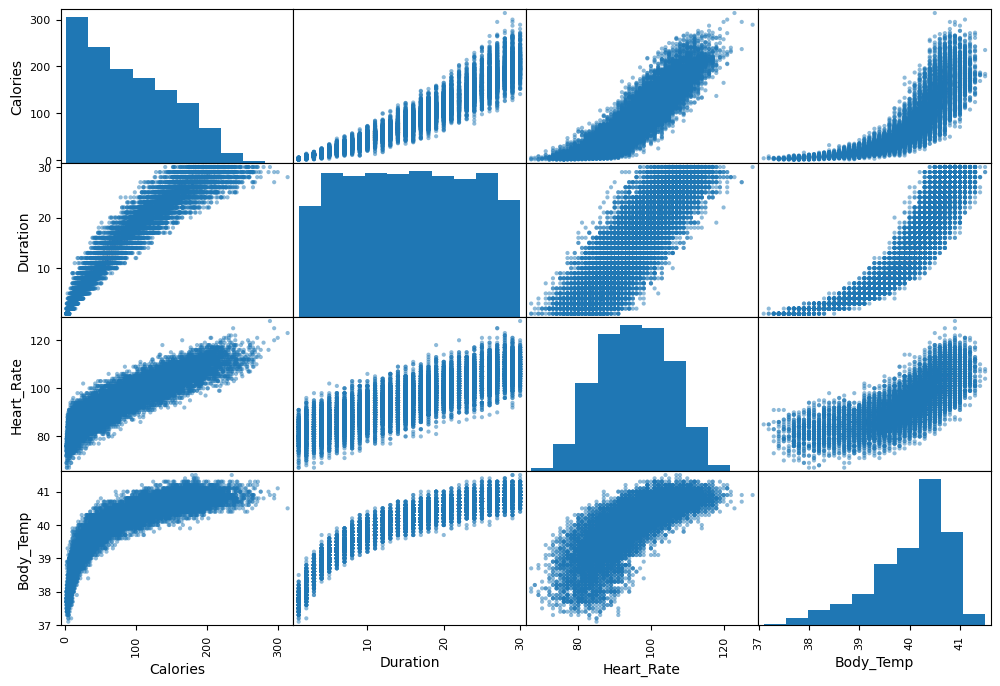

In [22]:
from pandas.plotting import scatter_matrix
attributes=["Calories","Duration","Heart_Rate","Body_Temp","Gender"]
scatter_matrix(calories_excercise_data[attributes],figsize=(12,8))

# converting attribute gender into numeric

In [23]:
calories_excercise_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [24]:
calories_excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Seprating features and Target

In [25]:
X = calories_excercise_data.drop(columns=["User_ID","Calories"],axis=1)
Y = calories_excercise_data['Calories']

In [26]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [27]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Train-Test Splitting

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
X.shape,X_train.shape,X_test.shape

((15000, 7), (12000, 7), (3000, 7))


# Model Training

In [30]:
model = xgb.XGBRegressor()

In [31]:
model.fit(X_train,Y_train)

C:\Users\Prakhar pc\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
test_data_prediction=model.predict(X_test)

In [33]:
test_data_prediction

array([127.823784, 226.00154 ,  38.66253 , ..., 144.3636  ,  22.767195,
        89.87375 ], dtype=float32)

Mean absolute Error

In [34]:
mae = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [35]:
mae

1.4807048829992613

In [36]:
from joblib import dump,load

In [37]:
dump(model,'calories.joblib')

['calories.joblib']

In [38]:
model = load('calories.joblib')
features = np.array([[0,21,185.0,77.0,245.0,99.0,35.0]])
model.predict(features)

array([140.92627], dtype=float32)